In [2]:
from run import run_game
final_game = run_game('initial_state.txt')

print(final_game.min_player_visited_nodes)
print(final_game.max_player_visited_nodes)

TypeError: run_game() missing 2 required positional arguments: 'max_player_strategy' and 'min_player_strategy'

In [1]:
import threading
from strategy import GameStrategy, PlayerStrategy
from run import run_game

# Define a function to run the game and store the result
def run_game_and_store_result(init_game_state_filename, max_player_strategy, min_player_strategy, prune, sort, max_depth=3, result_array=None):
    game_result = run_game(init_game_state_filename, max_player_strategy, min_player_strategy, max_depth, False, prune, sort)
    if result_array is not None:
        result_array.append(game_result)

# Create an array to store the game results
game_results = []

# Define the arguments for the run_game function
init_game_state_filename = 'initial_state.txt'
max_player_strategy = GameStrategy(True, PlayerStrategy.EARLY_GAME_CONQUER_CENTER, PlayerStrategy.MIDDLE_GAME_MOVE_DIAGONAL, PlayerStrategy.END_GAME_FILL_FROM_END)
min_player_strategy = GameStrategy(False, PlayerStrategy.EARLY_GAME_CONQUER_CENTER, PlayerStrategy.MIDDLE_GAME_MOVE_DIAGONAL, PlayerStrategy.END_GAME_FILL_FROM_END)

thread_no_prune_no_sort = threading.Thread(target=run_game_and_store_result, args=(init_game_state_filename, max_player_strategy, min_player_strategy, False, False), kwargs={"max_depth": 3, "result_array": game_results})
thread_prune_no_sort = threading.Thread(target=run_game_and_store_result, args=(init_game_state_filename, max_player_strategy, min_player_strategy, True, False), kwargs={"max_depth": 3, "result_array": game_results})
thread_prune_sort = threading.Thread(target=run_game_and_store_result, args=(init_game_state_filename, max_player_strategy, min_player_strategy, True, True), kwargs={"max_depth": 3, "result_array": game_results})

threads = [thread_no_prune_no_sort, thread_prune_no_sort, thread_prune_sort]
# threads = [thread_prune_no_sort]

for thread in threads:
    thread.start()
    # thread = threading.Thread(target=run_game_and_store_result, args=(init_game_state_filename, max_player_strategy, min_player_strategy), kwargs={"max_depth": 2, "result_array": game_results})
    # thread.start()
    # threads.append(thread)

# Wait for all threads to finish
for thread in threads:
    thread.join()

Player: MAX [1] | Turn: 1 | Move: 1
Evaluation: -106, nodes count: 2450
Player: MAX [1] | Turn: 1 | Move: 1
Evaluation: -106, nodes count: 2372
Player: MIN [2] | Turn: 1 | Move: 2
Evaluation: 106, nodes count: 5186
Player: MIN [2] | Turn: 1 | Move: 2
Evaluation: 106, nodes count: 2414
Player: MAX [1] | Turn: 2 | Move: 3
Evaluation: -100, nodes count: 5314
Player: MAX [1] | Turn: 2 | Move: 3
Evaluation: -100, nodes count: 12376
Player: MIN [2] | Turn: 2 | Move: 4
Evaluation: 100, nodes count: 5926
Player: MIN [2] | Turn: 2 | Move: 4
Evaluation: 100, nodes count: 16366
Player: MAX [1] | Turn: 3 | Move: 5
Evaluation: -95, nodes count: 10203
Player: MIN [2] | Turn: 3 | Move: 6
Evaluation: 95, nodes count: 9783
Player: MAX [1] | Turn: 3 | Move: 5
Evaluation: -95, nodes count: 34323
Player: MAX [1] | Turn: 4 | Move: 7
Evaluation: -91, nodes count: 15026
Player: MAX [1] | Turn: 1 | Move: 1
Evaluation: -106, nodes count: 87080
Player: MIN [2] | Turn: 4 | Move: 8
Evaluation: 91, nodes count: 15

In [2]:
from strategy import GameStrategy, PlayerStrategy
init_game_state_filename = 'initial_state.txt'
max_player_strategy = GameStrategy(True, PlayerStrategy.EARLY_GAME_CONQUER_CENTER, PlayerStrategy.MIDDLE_GAME_MOVE_DIAGONAL, PlayerStrategy.END_GAME_FILL_FROM_END)
min_player_strategy = GameStrategy(False, PlayerStrategy.EARLY_GAME_CONQUER_CENTER, PlayerStrategy.MIDDLE_GAME_MOVE_DIAGONAL, PlayerStrategy.END_GAME_FILL_FROM_END)

In [3]:
from run import run_game
game_result_prune_sort = run_game(init_game_state_filename, max_player_strategy, min_player_strategy, 3, False, True, True)

Player: MAX [1] | Turn: 1 | Move: 1
Evaluation: -106, nodes count: 2372
Player: MIN [2] | Turn: 1 | Move: 2
Evaluation: 106, nodes count: 2414
Player: MAX [1] | Turn: 2 | Move: 3
Evaluation: -100, nodes count: 5314
Player: MIN [2] | Turn: 2 | Move: 4
Evaluation: 100, nodes count: 5926
Player: MAX [1] | Turn: 3 | Move: 5
Evaluation: -95, nodes count: 10203
Player: MIN [2] | Turn: 3 | Move: 6
Evaluation: 95, nodes count: 9783
Player: MAX [1] | Turn: 4 | Move: 7
Evaluation: -91, nodes count: 15026
Player: MIN [2] | Turn: 4 | Move: 8
Evaluation: 91, nodes count: 15710
Player: MAX [1] | Turn: 5 | Move: 9
Evaluation: -85, nodes count: 19963
Player: MIN [2] | Turn: 5 | Move: 10
Evaluation: 85, nodes count: 18502
Player: MAX [1] | Turn: 6 | Move: 11
Evaluation: -80, nodes count: 28384
Player: MIN [2] | Turn: 6 | Move: 12
Evaluation: 80, nodes count: 26848
Player: MAX [1] | Turn: 7 | Move: 13
Evaluation: -76, nodes count: 37042
Player: MIN [2] | Turn: 7 | Move: 14
Evaluation: 76, nodes count: 2

In [4]:
from run import run_game
game_result_prune_no_sort = run_game(init_game_state_filename, max_player_strategy, min_player_strategy, 3, False, True, False)

Player: MAX [1] | Turn: 1 | Move: 1
Evaluation: -420, nodes count: 5453
Player: MIN [2] | Turn: 1 | Move: 2
Evaluation: 420, nodes count: 5254
Player: MAX [1] | Turn: 2 | Move: 3
Evaluation: -415, nodes count: 14982
Player: MIN [2] | Turn: 2 | Move: 4
Evaluation: 415, nodes count: 9672
Player: MAX [1] | Turn: 3 | Move: 5
Evaluation: -409, nodes count: 16115
Player: MIN [2] | Turn: 3 | Move: 6
Evaluation: 409, nodes count: 17548
Player: MAX [1] | Turn: 4 | Move: 7
Evaluation: -403, nodes count: 38909
Player: MIN [2] | Turn: 4 | Move: 8
Evaluation: 403, nodes count: 27852
Player: MAX [1] | Turn: 5 | Move: 9
Evaluation: -396, nodes count: 43705
Player: MIN [2] | Turn: 5 | Move: 10
Evaluation: 396, nodes count: 23404
Player: MAX [1] | Turn: 6 | Move: 11
Evaluation: -390, nodes count: 23481
Player: MIN [2] | Turn: 6 | Move: 12
Evaluation: 390, nodes count: 70260
Player: MAX [1] | Turn: 7 | Move: 13
Evaluation: -386, nodes count: 25940
Player: MIN [2] | Turn: 7 | Move: 14
Evaluation: 386, no

In [5]:
from run import run_game
game_result_no_prune_no_sort = run_game(init_game_state_filename, max_player_strategy, min_player_strategy, 3, False, False, False)

Player: MAX [1] | Turn: 1 | Move: 1
Evaluation: -420, nodes count: 87080
Player: MIN [2] | Turn: 1 | Move: 2
Evaluation: 420, nodes count: 137128
Player: MAX [1] | Turn: 2 | Move: 3
Evaluation: -415, nodes count: 279846
Player: MIN [2] | Turn: 2 | Move: 4
Evaluation: 415, nodes count: 342020
Player: MAX [1] | Turn: 3 | Move: 5
Evaluation: -409, nodes count: 497651
Player: MIN [2] | Turn: 3 | Move: 6
Evaluation: 409, nodes count: 659201
Player: MAX [1] | Turn: 4 | Move: 7
Evaluation: -403, nodes count: 1104762
Player: MIN [2] | Turn: 4 | Move: 8
Evaluation: 403, nodes count: 1310532
Player: MAX [1] | Turn: 5 | Move: 9
Evaluation: -396, nodes count: 1774411
Player: MIN [2] | Turn: 5 | Move: 10
Evaluation: 396, nodes count: 1973479
Player: MAX [1] | Turn: 6 | Move: 11
Evaluation: -390, nodes count: 2532456
Player: MIN [2] | Turn: 6 | Move: 12
Evaluation: 390, nodes count: 2774516
Player: MAX [1] | Turn: 7 | Move: 13
Evaluation: -386, nodes count: 3313760
Player: MIN [2] | Turn: 7 | Move: 

In [15]:
print(game_result_no_prune_no_sort.max_player_visited_nodes)

{1: 87080, 2: 279846, 3: 497651, 4: 1104762, 5: 1774411, 6: 2532456, 7: 3313760}


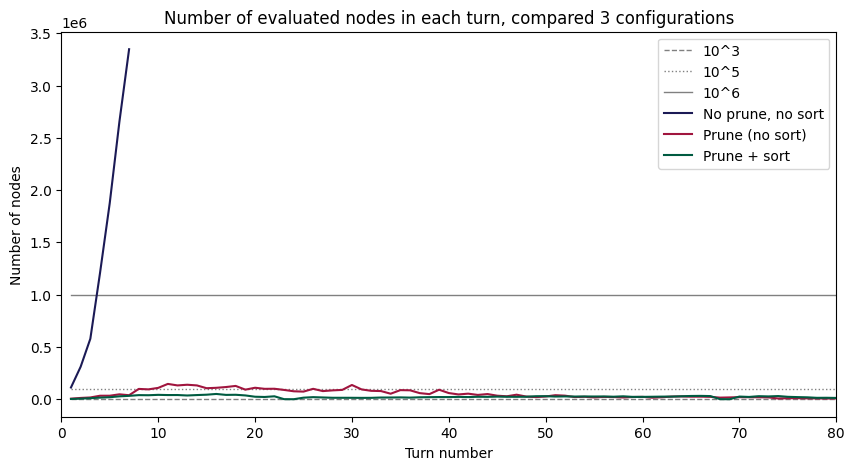

In [34]:
import matplotlib.pyplot as plt
import numpy as np

x_1 = list(game_result_no_prune_no_sort.max_player_visited_nodes.keys())
x_2 = list(game_result_prune_no_sort.max_player_visited_nodes.keys())
x_3 = list(game_result_prune_sort.max_player_visited_nodes.keys())

y_1_max = list(game_result_no_prune_no_sort.max_player_visited_nodes.values())
y_1_min = list(game_result_no_prune_no_sort.min_player_visited_nodes.values())
y_1 = [round((y_min + y_max)/2) for y_min, y_max in zip(y_1_min, y_1_max)]

y_2_max = list(game_result_prune_no_sort.max_player_visited_nodes.values())
y_2_min = list(game_result_prune_no_sort.min_player_visited_nodes.values())
y_2 = [round((y_min + y_max)/2) for y_min, y_max in zip(y_2_min, y_2_max)]

y_3_max = list(game_result_prune_sort.max_player_visited_nodes.values())
y_3_min = list(game_result_prune_sort.min_player_visited_nodes.values())
y_3 = [round((y_min + y_max)/2) for y_min, y_max in zip(y_3_min, y_3_max)]

baselines = [1000, 100000, 1000000]
baselines_labels = ['10^3', '10^5', '10^6']
baselines_styles = ['--', 'dotted', 'solid']

fig, ax = plt.subplots(figsize=(10,5))

for baseline, label, style in zip(baselines, baselines_labels, baselines_styles):
    ax.plot([x_2[0], x_2[-1]], [baseline, baseline], label=label, color="gray", linestyle=style, linewidth=1,)
    # ax.text(x_2[-1] * 1.01, baseline, label, color="gray", fontweight="bold", horizontalalignment="left", verticalalignment="center")

colors = ["#1B1A55", "#A0153E", "#005B41"]

ax.plot(x_1, y_1, label='No prune, no sort', color=colors[0])
# ax.text(x_2[-1] * 1.01, y_1[-1], 'No prune, no sort', color=colors[0], fontweight="bold", horizontalalignment="left", verticalalignment="center")

ax.plot(x_2, y_2, label='Prune (no sort)', color=colors[1])
# ax.text(x_2[-1] * 1.01, y_2[-1], 'Prune (no sort)', color=colors[1], fontweight="bold", horizontalalignment="left", verticalalignment="center")

ax.plot(x_3, y_3, label='Prune + sort', color=colors[2])
# ax.text(x_2[-1] * 1.01, y_3[-1], 'Prune + sort', color=colors[2], fontweight="bold", horizontalalignment="left", verticalalignment="center")

ax.set_xlabel('Turn number')
ax.set_ylabel('Number of nodes')
ax.set_xlim(0,80)
# ax.set_ylim(0,500000)
ax.set_title('Number of evaluated nodes in each turn, compared 3 configurations')
ax.legend(loc='upper right')

plt.savefig('../charts/3_configs_node_count.png', dpi=300)

plt.show()

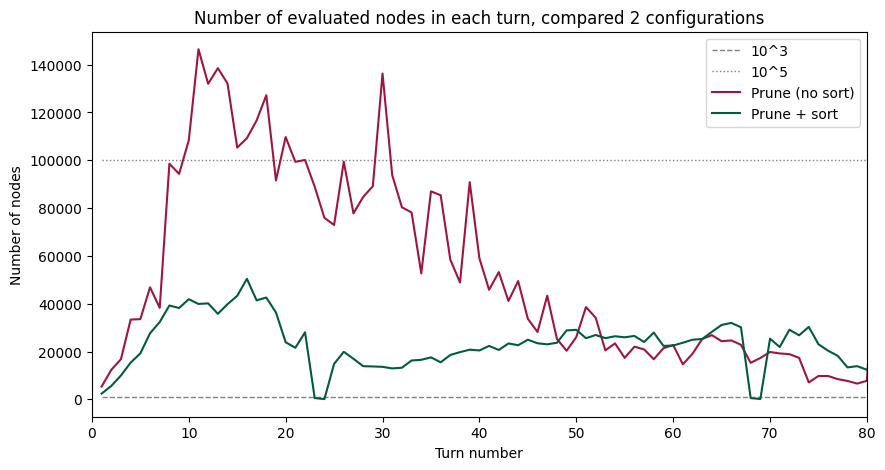

In [38]:
import matplotlib.pyplot as plt
import numpy as np

x_2 = list(game_result_prune_no_sort.max_player_visited_nodes.keys())
x_3 = list(game_result_prune_sort.max_player_visited_nodes.keys())

y_2_max = list(game_result_prune_no_sort.max_player_visited_nodes.values())
y_2_min = list(game_result_prune_no_sort.min_player_visited_nodes.values())
y_2 = [round((y_min + y_max)/2) for y_min, y_max in zip(y_2_min, y_2_max)]

y_3_max = list(game_result_prune_sort.max_player_visited_nodes.values())
y_3_min = list(game_result_prune_sort.min_player_visited_nodes.values())
y_3 = [round((y_min + y_max)/2) for y_min, y_max in zip(y_3_min, y_3_max)]

baselines = [1000, 100000]
baselines_labels = ['10^3', '10^5']
baselines_styles = ['--', 'dotted']

fig, ax = plt.subplots(figsize=(10,5))

for baseline, label, style in zip(baselines, baselines_labels, baselines_styles):
    ax.plot([x_2[0], x_2[-1]], [baseline, baseline], label=label, color="gray", linestyle=style, linewidth=1,)
    # ax.text(x_2[-1] * 1.01, baseline, label, color="gray", fontweight="bold", horizontalalignment="left", verticalalignment="center")

colors = ["#1B1A55", "#A0153E", "#005B41"]

ax.plot(x_2, y_2, label='Prune (no sort)', color=colors[1])
# ax.text(x_2[-1] * 1.01, y_2[-1], 'Prune (no sort)', color=colors[1], fontweight="bold", horizontalalignment="left", verticalalignment="center")

ax.plot(x_3, y_3, label='Prune + sort', color=colors[2])
# ax.text(x_2[-1] * 1.01, y_3[-1], 'Prune + sort', color=colors[2], fontweight="bold", horizontalalignment="left", verticalalignment="center")

ax.set_xlabel('Turn number')
ax.set_ylabel('Number of nodes')
ax.set_xlim(0,80)
# ax.set_ylim(0,500000)
ax.set_title('Number of evaluated nodes in each turn, compared 2 configurations')
ax.legend(loc='upper right')

plt.savefig('../charts/2_configs_node_count.png', dpi=300)

plt.show()

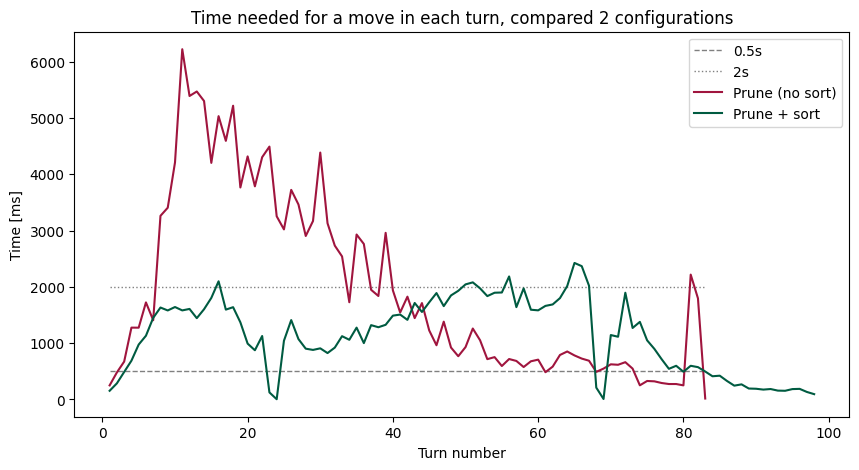

In [42]:
import matplotlib.pyplot as plt
import numpy as np

x_2 = list(game_result_prune_no_sort.max_player_move_time.keys())
x_3 = list(game_result_prune_sort.max_player_move_time.keys())

y_2_max = list(game_result_prune_no_sort.max_player_move_time.values())
y_2_min = list(game_result_prune_no_sort.min_player_move_time.values())
y_2 = [round((y_min + y_max)/2) for y_min, y_max in zip(y_2_min, y_2_max)]

y_3_max = list(game_result_prune_sort.max_player_move_time.values())
y_3_min = list(game_result_prune_sort.min_player_move_time.values())
y_3 = [round((y_min + y_max)/2) for y_min, y_max in zip(y_3_min, y_3_max)]

baselines = [500, 2000]
baselines_labels = ['0.5s', '2s']
baselines_styles = ['--', 'dotted']

fig, ax = plt.subplots(figsize=(10,5))

for baseline, label, style in zip(baselines, baselines_labels, baselines_styles):
    ax.plot([x_2[0], x_2[-1]], [baseline, baseline], label=label, color="gray", linestyle=style, linewidth=1,)
    # ax.text(x_2[-1] * 1.01, baseline, label, color="gray", fontweight="bold", horizontalalignment="left", verticalalignment="center")

colors = ["#1B1A55", "#A0153E", "#005B41"]

ax.plot(x_2, y_2, label='Prune (no sort)', color=colors[1])
# ax.text(x_2[-1] * 1.01, y_2[-1], 'Prune (no sort)', color=colors[1], fontweight="bold", horizontalalignment="left", verticalalignment="center")

ax.plot(x_3, y_3, label='Prune + sort', color=colors[2])
# ax.text(x_2[-1] * 1.01, y_3[-1], 'Prune + sort', color=colors[2], fontweight="bold", horizontalalignment="left", verticalalignment="center")

ax.set_xlabel('Turn number')
ax.set_ylabel('Time [ms]')
# ax.set_xlim(0,80)
# ax.set_ylim(0,500000)
ax.set_title('Time needed for a move in each turn, compared 2 configurations')
ax.legend(loc='upper right')

plt.savefig('../charts/2_configs_move_time.png', dpi=300)

plt.show()